Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

The goal of this analysis is to use patient data to predite the insurance cost

Dataset: The dataset is from Kaggle

Attribute Information
Input variables
1:age: age of primary beneficiary
2:sex: insurance contractor gender, female, male
3.bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
4.children: Number of children covered by health insurance / Number of dependents
5.Smoker: Smoking
6.region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7.charges: Individual medical costs billed by health insurance
Output variable:
8 - Charges 

Project Objective : Understand the Dataset & cleanup (if required).
Build classification models to predict predict the insurance cost based on various certain features and attributes
Also fine-tune the hyperparameters & compare the evaluation metrics of various regression algorithms, choose the best model with highest accuracy.

Steps to Follow for the Project: The dataset contains 7 features and 1338 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# 1: Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

# 2: Importing required Dataset¶

In [3]:
# Importing the dataset
medical_data=pd.read_csv('medical_cost_insurance.csv')
medical_data.tail(20)  # displaying first 20 records from the dataset

,age,sex,bmi,children,smoker,region,charges
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470


# 3: Data Cleaning and Transfroming

In [4]:
medical_data.shape # to determine the dimension of the dataset

(1338, 7)

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Determine the Categorical and Numeric Values
features=medical_data.drop('charges',axis=1)
nu = features.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(features.shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 2 numerical & 4 categorical features.


In [7]:
cf # displaying the list of the categorical features

['sex', 'smoker', 'region', 'children']

In [8]:
# Checking for missing values
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can infer that there is no missing values and the dataset is appropriate for the prediction

In [9]:
# Converting Categorial featues to Numerical Features

In [10]:
medical_data['region'].unique() # displaying distinct values for region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
bins = [17,35,55,1000]
slots = ['Young','Senior Adult','Elder']

medical_data['Age_range']=pd.cut(medical_data['age'],bins=bins,labels=slots)

In [12]:
medical_data['sex'].replace(['male','female'],[0, 1], inplace=True)
medical_data['region'].replace(['southwest','southeast','northwest','northeast'],[0, 1,2,3], inplace=True)
medical_data['smoker'].replace(['no','yes'],[0, 1], inplace=True)
medical_data['Age_range'].replace(['Young','Senior Adult','Elder'],[0, 1,2],inplace=True)
medical_data

,age,sex,bmi,children,smoker,region,charges,Age_range
0,19,1,27.900,0,1,0,16884.92400,0
1,18,0,33.770,1,0,1,1725.55230,0
2,28,0,33.000,3,0,1,4449.46200,0
3,33,0,22.705,0,0,2,21984.47061,0
4,32,0,28.880,0,0,2,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830,1
1334,18,1,31.920,0,0,3,2205.98080,0
1335,18,1,36.850,0,0,1,1629.83350,0
1336,21,1,25.800,0,0,0,2007.94500,0


In [13]:
medical_data=medical_data.drop('age',axis=1) # drop the age column


In [14]:
medical_data.describe() # Performing Descriptive Statistical Analysis on the  Features

,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Statistics for Medical Insurance dataset:

Minimum insurance cost: 1,121.87
Maximum insurance acost: 63,770.43
Mean insurance cost: 13,270.42
Standard deviation of insurance costs: 12,110.01

In [15]:
# Checking for duplicate values
medical_data.duplicated()
# displaying the number of duplicated values in the dataset
medical_data[medical_data.duplicated()==True].shape[0]

1

In [16]:
# Dropping the duplicated values
medical_data.drop_duplicates(inplace=True)

In [17]:
# Confirming if the duplicated values have been dropped
medical_data.duplicated().any()

False

In [18]:
medical_data['age']=medical_data['Age_range'] # replacing column Age_range column with age column


In [19]:
medical_data=medical_data.drop('Age_range',axis=1) # drop the Age_range column
medical_data

,sex,bmi,children,smoker,region,charges,age
0,1,27.900,0,1,0,16884.92400,0
1,0,33.770,1,0,1,1725.55230,0
2,0,33.000,3,0,1,4449.46200,0
3,0,22.705,0,0,2,21984.47061,0
4,0,28.880,0,0,2,3866.85520,0
...,...,...,...,...,...,...,...
1333,0,30.970,3,0,2,10600.54830,1
1334,1,31.920,0,0,3,2205.98080,0
1335,1,36.850,0,0,1,1629.83350,0
1336,1,25.800,0,0,0,2007.94500,0


In [20]:
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(medical_data['age'])
 
# printing label
label

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

In [21]:

# removing the column 'Purchased' from df
# as it is of no use now.
medical_data.drop("age", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
medical_data["age"] = label
 
# printing Dataframe
medical_data

,sex,bmi,children,smoker,region,charges,age
0,1,27.900,0,1,0,16884.92400,0
1,0,33.770,1,0,1,1725.55230,0
2,0,33.000,3,0,1,4449.46200,0
3,0,22.705,0,0,2,21984.47061,0
4,0,28.880,0,0,2,3866.85520,0
...,...,...,...,...,...,...,...
1333,0,30.970,3,0,2,10600.54830,1
1334,1,31.920,0,0,3,2205.98080,0
1335,1,36.850,0,0,1,1629.83350,0
1336,1,25.800,0,0,0,2007.94500,0


# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

In [22]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['smoker', 'children', 'sex', 'region','age']
    sns.boxplot(x=Categorical_column,y='charges', data=medical_data)
    plt.title(f"{Categorical_column.title()} vs Charges",fontweight="black",size=25,pad=10,)
    col_values = medical_data[Categorical_column].value_counts()
    plt.tight_layout()
  

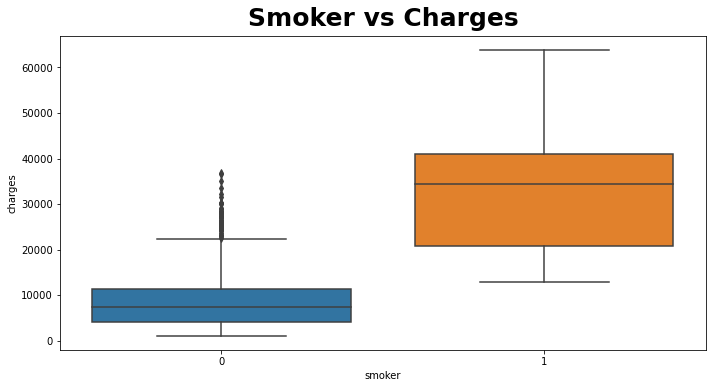

In [61]:
features_plot("smoker") # Calling function features_plot to plot smoker against charges

We can infer from the plot that medical charges are more for smoker than non smoker

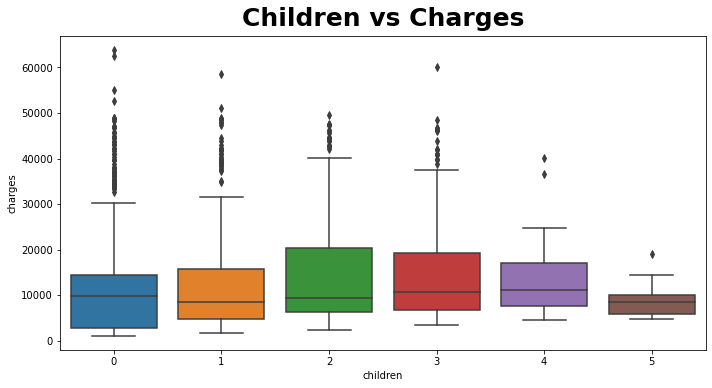

In [23]:
features_plot("children") # Calling function features_plot to plot Children (dependent) against charges

There is no correlation or defined relationship between children and Medical charges.

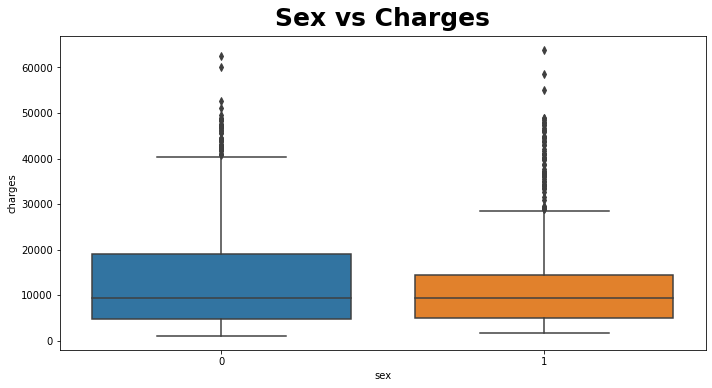

In [24]:
features_plot("sex") # Calling function features_plot to plot sex against charges

We can infer from the plot that medical charges are more for Male than Female

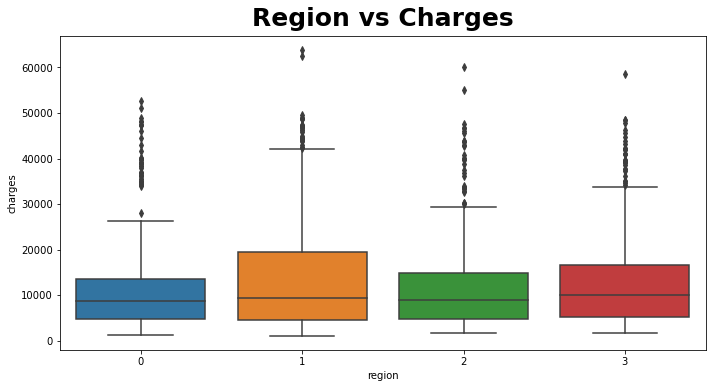

In [25]:
features_plot("region") # Calling function features_plot to plot region against charges

We can infer from the plot that medical charges are more for people from Southeast, Northeast and the least value is from southwest

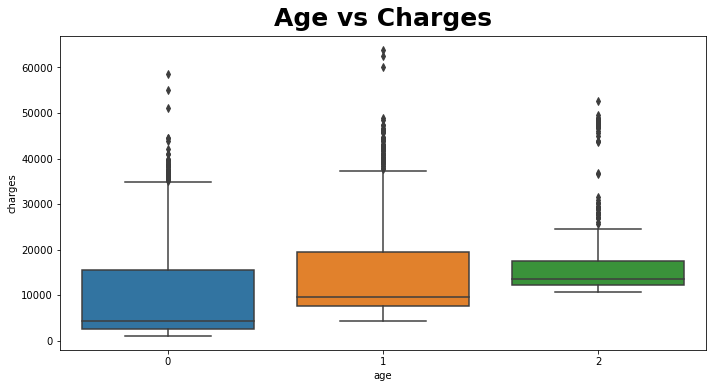

In [26]:
features_plot("age") # Calling function features_plot to plot age against charges

We can infer from the plot that Senior Adults are chraged more and elder are charged less

Text(0.5, 1.0, 'BMI VS Charge')

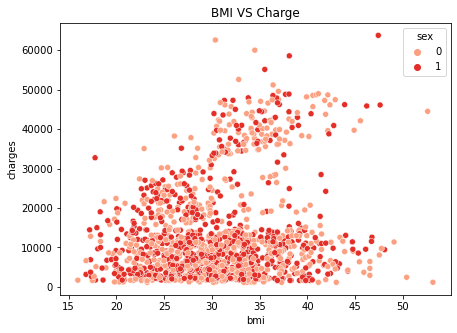

In [27]:
# BMI against charges using scatterplot
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=medical_data,palette='Reds')
plt.title('BMI VS Charge')

In [28]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1337 non-null   int64  
 1   bmi       1337 non-null   float64
 2   children  1337 non-null   int64  
 3   smoker    1337 non-null   int64  
 4   region    1337 non-null   int64  
 5   charges   1337 non-null   float64
 6   age       1337 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


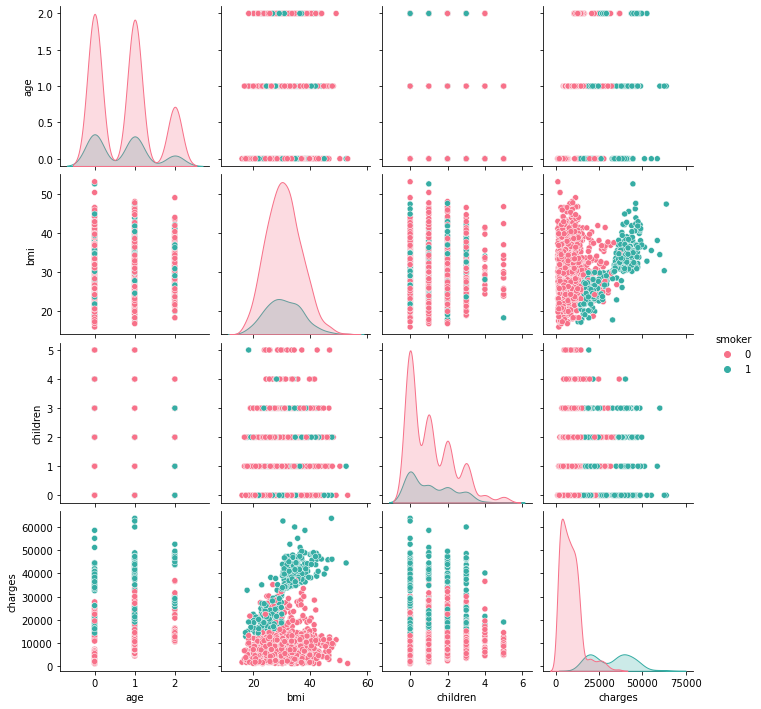

In [29]:
#Pairplot of all numerical variables
sns.pairplot(medical_data, vars=['age','bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

There are some strong correlation between smoking, BMI and medical charges

# 5: Feature Selection/Extraction- to identify the most relevant features

In [32]:
# Convert the dictionary into DataFrame
medical_data = pd.DataFrame(medical_data)
  
# Remove three columns as index base
#medical_data.drop(medical_data.columns[[6, 7, 8]], axis=1, inplace=True)
medical_data

,sex,bmi,children,smoker,region,charges,age
0,1,27.900,0,1,0,16884.92400,0
1,0,33.770,1,0,1,1725.55230,0
2,0,33.000,3,0,1,4449.46200,0
3,0,22.705,0,0,2,21984.47061,0
4,0,28.880,0,0,2,3866.85520,0
...,...,...,...,...,...,...,...
1333,0,30.970,3,0,2,10600.54830,1
1334,1,31.920,0,0,3,2205.98080,0
1335,1,36.850,0,0,1,1629.83350,0
1336,1,25.800,0,0,0,2007.94500,0


C:\Users\ayoba\AppData\Local\Temp\ipykernel_16160\1078822018.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(medical_data.corr(), dtype=np.bool)


<AxesSubplot:>

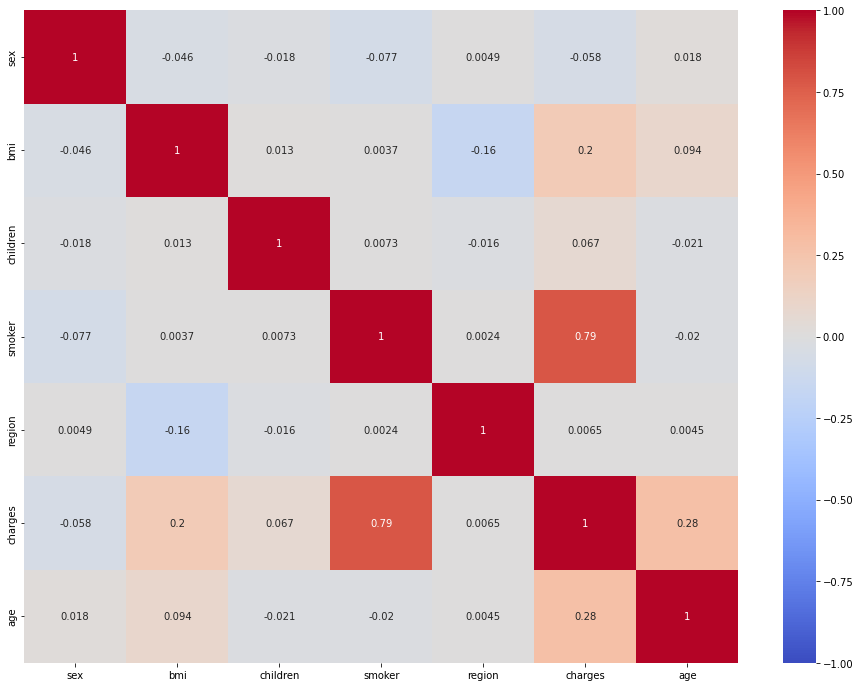

In [33]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(medical_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=medical_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Smoker,age have high correlation with charges and sex, children and region does not have any effect on charges.

# 6: Data Preprocessing

In [34]:
# Separating feature data and Label data
X = medical_data.drop(['charges'],axis=1) # drop column charges
y = medical_data['charges'].values.reshape(-1,1)

In [35]:
# Standardizing the dataset
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [36]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)


[1005   57  306 ...   32   91 1171]


C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y_transformed, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1002, 6), (335, 6), (1002,), (335,))

# 7: Predictive Modelling using various algorithms

Linear Regression

In [38]:
lreg=LinearRegression()

In [39]:
lreg.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred= lreg.predict(X_test)
y_pred

array([ 532.07095864,  432.60517408,  731.00440484, 1078.93111653,
        400.90218077,  657.55119046, 1087.20208224,  263.74178015,
        632.5975017 ,  669.8791373 ,  797.20498496, 1184.36639213,
       1007.50147238,  878.91234218,  451.14666782,  602.20509848,
        321.11809083, 1248.73238623,  317.64320199,  343.05116113,
        318.56569227, 1241.72048375,  706.69005679, 1202.45323537,
        986.92007871,  416.42668012, 1338.54429693, 1443.96854271,
        636.57511162,  756.99748066,  336.42853925,  614.78942668,
        288.69049625,  816.66199514, 1290.61771892,  612.23746001,
        487.51948723,  392.15953886, 1140.1759607 ,  596.56709169,
        377.91810229, 1269.1081663 , 1333.73373395,  619.19427466,
        612.31294303,  270.86241454,  380.17296985,  591.82497476,
        339.22478134,  633.00873727,  399.91178101,  627.67734303,
       1253.23866506,  295.5358187 ,  635.90943459,  625.17603944,
        597.54754612,  322.98973493,  990.51683698,  638.22556

In [52]:
#pred_prob=lreg.predict_prob(X_test)
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_training=round(lreg.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",LR_testing,"%","&   ", "Accuracy Score of Training Data is =>", LR_training,"%")

Accuracy Score of Testing Data is => 70.34 % &    Accuracy Score of Training Data is => 76.14 %


In [53]:
# Model Accuracy
#lr=metrics.accuracy_score(y_test, y_pred)*100
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 37041.8


Mean absolute error: 137.00


R2 Score: 0.76


Support Vector Machine

In [54]:
# call "Support vector classifier"
from sklearn.svm import SVC
svmModel=SVC(kernel='rbf',random_state=1)
svmModel.fit(X_train,y_train)

SVC(random_state=1)

In [55]:
#Predicting the test set result
svmpredict=svmModel.predict(X_test)
svmpredict

array([ 666,  460,  873, 1075,  271,  645, 1333,  189,  488,  467,  902,
       1065, 1254,  928,  223,  474,  961, 1261,  251,  221,  199, 1104,
        872, 1116, 1221, 1144, 1255, 1308,  757,  807,  260,  668,  335,
        813, 1262,  443,  343,  351, 1054,  486,  121, 1133, 1293,  642,
        496,   91,  121,  504,  389, 1115,  176,  542, 1070,  149,  431,
       1115,  683,  164, 1226,  599,  872,  208,  519,  195,  811,  649,
        800, 1253,  995,  916,  722, 1086,  660,  330,  713,   59,  749,
        327,  611,  887,  368,  773,  946,  514, 1170,  895,  195,  185,
        892,  148,  981,  997,  428,  147,  249, 1279,  395,  486,  149,
        619,  833, 1162, 1052,  680, 1209,   31, 1291, 1047,  862,   74,
        837,  956, 1039,  450,   18,   22,  389,  149,    8,  582, 1267,
        211,  668,  306,  791,  686,  428,  805, 1217, 1320, 1170,  889,
         68,  526,  440, 1131, 1262, 1070, 1024,  806,  386,  290, 1262,
        660,    8,  530,  255,  465, 1327,  945,  7

In [56]:
#pred_prob=lreg.predict_prob(X_test)
svmModel_testing=round(svmModel.score(X_train, y_train)*100,2)
svmModel_training=round(svmModel.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",svmModel_testing,"%","&   ", "Accuracy Score of Training Data is =>", svmModel_training,"%")

Accuracy Score of Testing Data is => 98.0 % &    Accuracy Score of Training Data is => 0.0 %


In [58]:
# SVM  Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(y_test,svmpredict))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,svmpredict))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,svmpredict))



Mean squared error: 64986.2


Mean absolute error: 154.15


R2 Score: 0.58


K- Nearest Neighbour

In [59]:
# Instantiate the model with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=6,metric='manhattan') # create instance of K-neighbor classifier
model=knn.fit(X_train,y_train) #  Training the model 
model

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [60]:
y_pred_k=knn.predict(X_test) # predicting using the model
y_pred_k

array([ 491,  282,  546, 1075,  226,  402, 1210,   62,  488,  467,  902,
       1030, 1010,  778,  223,  474,  138, 1232,   72,  208,   27, 1065,
        337, 1113, 1024,  333, 1255,  919,  533,  484,  118,  447,    0,
        765, 1213,  443,  282,  332,  989,  399,  118, 1003, 1261,  473,
        481,   62,  118,  443,  164,  402,  176,  542, 1063,    3,  431,
        402,  429,  164, 1059,  442,  522,  123,  519,   50,  534,  506,
        473,  989,  995,  869,  378,  118,  429,  155,  491,   59,  747,
         58,  398,  782,  172,  617,  814,  402, 1063,  813,   49,   56,
         81,    3,  843,  997,  257,   14,   64, 1065,  395,  399,    3,
        516,  775,  560, 1052,  431, 1027,   29,  984, 1018,  432,   72,
        425,  830,  118,  223,   16,    5,  164,    3,    6,  481, 1056,
        126,  447,  153,  512,  431,  251,  774, 1199, 1159, 1142,  503,
          0,  526,  230,  322, 1093, 1002, 1014,   28,  264,  281, 1213,
        429,    6,  417,    8,  398, 1252,  840,  5

In [61]:
#pred_prob=lreg.predict_prob(X_test)
y_pred_k_testing=round(knn.score(X_train, y_train)*100,2)
y_pred_k_training=round(knn.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",y_pred_k_testing,"%","&   ", "Accuracy Score of Training Data is =>", y_pred_k_training,"%")

Accuracy Score of Testing Data is => 14.27 % &    Accuracy Score of Training Data is => 0.0 %


In [62]:
# K_nearest Neighbor
print("Mean squared error: %.1f" % mean_squared_error(y_test,y_pred_k))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_k))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,y_pred_k))
print('\n')


Mean squared error: 61646.0


Mean absolute error: 165.24


R2 Score: 0.60




RandomForestClassifier

In [63]:
clf = RandomForestClassifier(n_estimators = 1200, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18)

In [64]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=1200,
                       random_state=18)

In [65]:
clf_pred = clf.predict(X_test)
clf_pred

array([ 666,  460,  873, 1075,  271,  645, 1333,  189,  488,  467,  902,
       1093, 1254,  928,  223,  474,  961, 1261,  251,  221,  199, 1104,
        337, 1116, 1221, 1144, 1292,  919,  757, 1009,  260,  668,  235,
        813, 1262,  443,  343,  351, 1054,  486,  121,  506, 1293,  642,
        496,   91,  121,  504,  389, 1115,  176,  542, 1070,    3,  431,
       1115,  683,  164, 1226,  599,  872,  208,  519,  195,  811,  649,
        800, 1253,  995,  916,  545, 1086,  660,  970,  713,   59,  749,
        327,  611,  887,  368,  617,  946,  514, 1170,  895,  195,  185,
        892,  148,  981,  997,  715,  147,  249, 1279,  395,  486,    3,
        619,  833, 1162, 1100,  680,  310,   31, 1333, 1047,  862,   74,
        837,  956, 1039,  450,   18,   22,  389,    3,    8,  582, 1267,
        211,  668,  306,  791,  686,  715,  805, 1217, 1321, 1170,  889,
         68,  526,  440, 1131, 1262, 1070, 1024,  806,  386, 1102, 1262,
        660,    8,  530,  255,  465, 1256,  945,  7

In [66]:
#pred_prob=lreg.predict_prob(X_test)
clf_pred_testing=round(clf.score(X_train, y_train)*100,2)
clf_pred_training=round(clf.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",clf_pred_testing,"%","&   ", "Accuracy Score of Training Data is =>", clf_pred_training,"%")

Accuracy Score of Testing Data is => 98.0 % &    Accuracy Score of Training Data is => 0.0 %


In [67]:
# Random Foreest Classification
print("Mean squared error: %.1f" % mean_squared_error(y_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(y_test,clf_pred))


Mean squared error: 74897.6


Mean absolute error: 168.92


R2 Score: 0.52


Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressorModel = RandomForestRegressor(n_estimators=300,max_depth=20, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=300, random_state=33)

In [69]:
RFG=RandomForestRegressorModel.predict(X_test)
RFG

array([ 653.01333333,  353.82333333,  804.54333333, 1219.90666667,
        346.99666667,  691.48853175, 1266.88666667,  192.32      ,
        594.12185714,  538.488     ,  947.96333333, 1103.94666667,
       1223.30666667,  879.16701587,  364.8       ,  612.61      ,
        603.89666667, 1265.13666667,  365.52333333,  245.90166667,
        411.55388889, 1110.93666667,  724.56666667, 1133.87      ,
       1231.07      ,  750.3       , 1297.44980952, 1304.75      ,
        699.56972222,  848.54333333,  359.56      ,  635.70313492,
        290.13388889,  894.80666667, 1292.40247619,  518.58657143,
        429.11      ,  423.97333333, 1026.76      ,  496.33027778,
        240.85333333, 1055.79666667, 1280.28333333,  702.86762626,
        520.73666667,  130.63666667,  241.11166667,  555.26194444,
        286.40166667,  700.54447012,  301.68666667,  648.48333333,
       1087.71333333,  278.01122222,  626.0052381 ,  579.59039683,
        527.97666667,  322.79833333, 1263.29      ,  581.68261

In [70]:
#pred_prob=lreg.predict_prob(X_test)
RFG_pred_testing=round(RandomForestRegressorModel.score(X_train, y_train)*100,2)
RFG_pred_training=round(RandomForestRegressorModel.score(X_test, y_test)*100,2)
print("Accuracy Score of Testing Data is =>",RFG_pred_testing,"%","&   ", "Accuracy Score of Training Data is =>", RFG_pred_training,"%")

Accuracy Score of Testing Data is => 95.85 % &    Accuracy Score of Training Data is => 73.32 %


<BarContainer object of 6 artists>

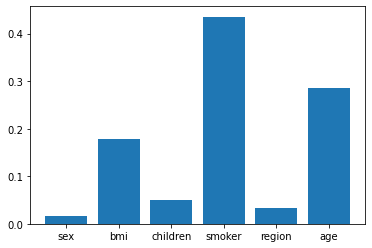

In [71]:
plt.bar(X.keys(),RandomForestRegressorModel.feature_importances_)

# 8: Comparing the models and Model Evaluation

In [72]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',fontweight="black",fontsize='22')

C:\Users\ayoba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


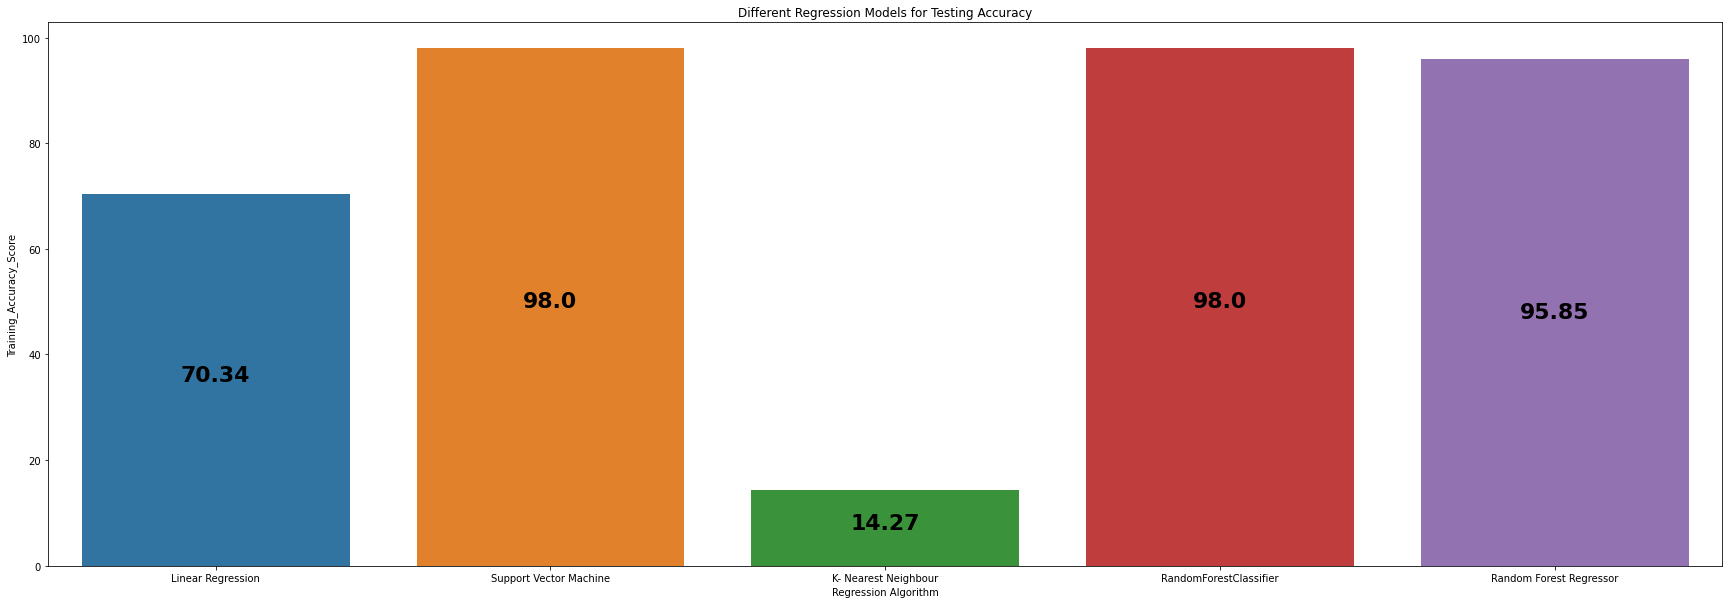

In [73]:
# Comparing the algorithms for Training dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
x= ['Linear Regression','Support Vector Machine','K- Nearest Neighbour','RandomForestClassifier','Random Forest Regressor']
y=  [LR_testing,svmModel_testing,y_pred_k_testing,clf_pred_testing,RFG_pred_testing]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Regression Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Regression Models for Testing Accuracy")

#plt.legend()
plt.show()

Key-Findings:
The key factors that significantly influence the charges are Smoker, Age and BMI.
The minimal impact of features on the charges sex, region and children.

Overall Model Performance: The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.